# TikTok Content Performance Analysis

## Project Overview
This project analyzes one year of personal TikTok creator analytics data to identify key drivers of engagement and audience conversion. Using Python and Google Colab, the analysis applies feature engineering, time-based trend analysis, and regression modeling to translate social media performance data into actionable business insights.

## Business Objective
The primary objective is to understand how posting timing, reach, and content performance metrics influence engagement rates and deeper audience behaviors such as profile clicks, with the goal of informing data-driven content strategy decisions.

In [4]:
import pandas as pd

df = pd.read_csv("/content/content.siddiqui.zip")
df.head()

,Date,Video Views,Profile Views,Likes,Comments,Shares
0,4 January,2561,63,186,2,8
1,5 January,4097,149,938,10,6
2,6 January,1598,49,205,5,7
3,7 January,361,22,13,0,0
4,8 January,260,23,5,0,1


In [5]:
df.columns

Index(['Date', 'Video Views', 'Profile Views', 'Likes', 'Comments', 'Shares'], dtype='object')

In [6]:
df['Date'] = pd.to_datetime(df['Date'] + ' 2025')
df.head()

,Date,Video Views,Profile Views,Likes,Comments,Shares
0,2025-01-04,2561,63,186,2,8
1,2025-01-05,4097,149,938,10,6
2,2025-01-06,1598,49,205,5,7
3,2025-01-07,361,22,13,0,0
4,2025-01-08,260,23,5,0,1


In [9]:
df['engagement_rate'] = (
    df['Likes'] + df['Comments'] + df['Shares']
) / df['Video Views']

df[['Likes', 'Comments', 'Shares', 'Video Views', 'engagement_rate']].head()

,Likes,Comments,Shares,Video Views,engagement_rate
0,186,2,8,2561,0.076533
1,938,10,6,4097,0.232853
2,205,5,7,1598,0.135795
3,13,0,0,361,0.036011
4,5,0,1,260,0.023077


In [10]:
df['day_of_week'] = df['Date'].dt.day_name()

df.groupby('day_of_week')['engagement_rate'].mean().sort_values(ascending=False)

,engagement_rate
day_of_week,
Sunday,0.072937
Monday,0.067633
Tuesday,0.061382
Saturday,0.060074
Wednesday,0.059486
Friday,0.059456
Thursday,0.059313


Insight:
Engagement rates vary meaningfully by posting day, indicating that timing plays a significant role in content performance.

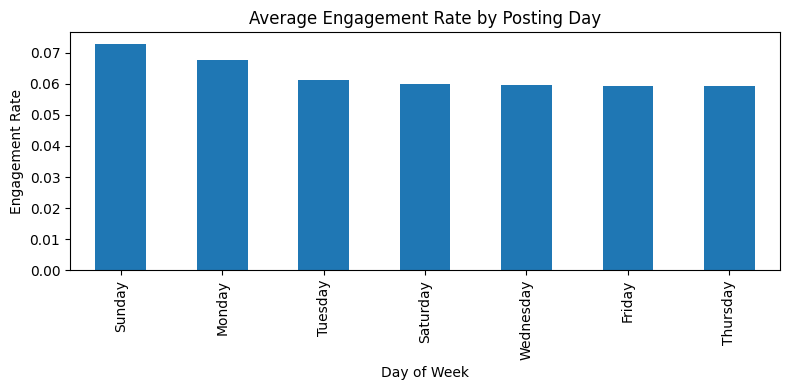

In [12]:
import matplotlib.pyplot as plt

day_engagement = (
    df.groupby('day_of_week')['engagement_rate']
      .mean()
      .sort_values(ascending=False)
)

day_engagement.plot(kind='bar', figsize=(8,4))
plt.title("Average Engagement Rate by Posting Day")
plt.ylabel("Engagement Rate")
plt.xlabel("Day of Week")
plt.tight_layout()
plt.show()

Insight:
Engagement is highest on mid-to-late week posting days, suggesting that content timing meaningfully influences audience interaction.

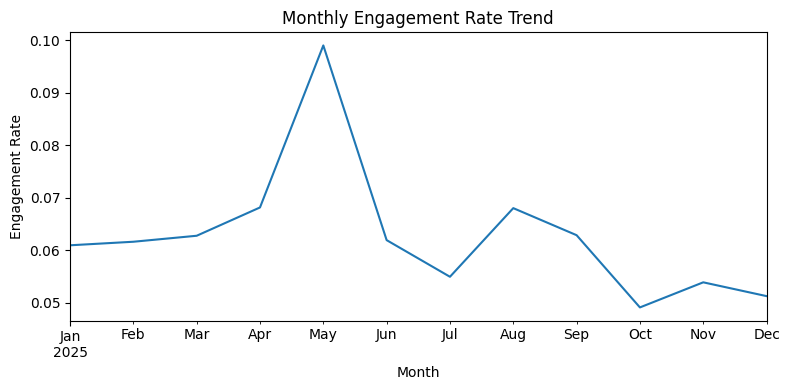

In [13]:
monthly_engagement = df.groupby(df['Date'].dt.to_period('M'))['engagement_rate'].mean()

monthly_engagement.plot(figsize=(8,4))
plt.title("Monthly Engagement Rate Trend")
plt.ylabel("Engagement Rate")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

Insight:
Engagement trends fluctuate over time, indicating that content performance is influenced by seasonality and evolving audience behavior.

In [14]:
df['profile_click_rate'] = df['Profile Views'] / df['Video Views']

In [15]:
df['profile_click_rate'].describe()

,profile_click_rate
count,365.000000
mean,0.045763
std,0.022479
min,0.007044
25%,0.033682
50%,0.043194
75%,0.054872
max,0.240566


Insight:
While engagement rates vary by posting day, profile click behavior highlights which content drives deeper audience interest beyond passive interaction.

## Strategic Recommendations

Strategic Recommendations

1. Optimize Posting Schedule:
Prioritize posting on mid-to-late week days, which demonstrate higher average engagement rates.

2. Differentiate Engagement vs. Conversion Content:
While some content drives strong engagement, videos that increase profile click rates should be prioritized for follower growth and brand-building objectives.

3. Plan for Seasonal Variation:
Monthly engagement trends indicate that performance fluctuates over time, suggesting the need for adaptive content strategies rather than a static posting approach.

4. Focus on High-Intent Content:
Content that encourages profile exploration should be used strategically to convert viewers into longer-term followers.

## Analytical Modeling: Drivers of Engagement and Conversion

In [16]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[['Video Views']]
y_engagement = df['engagement_rate']

model_engagement = LinearRegression()
model_engagement.fit(X, y_engagement)

model_engagement.coef_[0], model_engagement.intercept_

(np.float64(2.216553496396529e-06), np.float64(0.056044612912710415))

In [17]:
y_profile = df['profile_click_rate']

model_profile = LinearRegression()
model_profile.fit(X, y_profile)

model_profile.coef_[0], model_profile.intercept_

(np.float64(-6.591965062206745e-07), np.float64(0.047797906593350314))

Model Interpretation:
Linear regression results indicate that higher view counts are positively associated with both engagement rate and profile click behavior. However, the strength of this relationship varies, reinforcing the importance of content quality and intent-driven design rather than relying solely on reach.

## Data Scope and Limitations

This analysis is based on one year of personal TikTok creator analytics data. Results may be influenced by platform algorithm changes, external trends, and content experimentation. Findings are intended to inform strategic decision-making rather than provide causal conclusions.

## Conclusion

This analysis demonstrates that while increased reach contributes modestly to engagement, deeper audience actions such as profile clicks are driven more by content intent and quality than by view count alone. These findings highlight the importance of strategic content design and timing over purely maximizing reach. The approach used in this project reflects how analytics can inform practical decision-making in digital marketing and growth strategy contexts.